In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import time

In [2]:
start = time.time()
Headings = [ 'Date','Time','Temperature(C)','pH','Dosing','Gas_analyser_CO2%',
             'Gas_analyser_O2%','CO2_Flow_rate(ml/min)','O2_Flow_rate_(ml/min)',
                      'Dosing_(RPM)','Feed_(RPM)','Dosing_average_(on/off)',
                      'CO2_rate_(mol/Cmol/min)','O2_rate_(mol/Cmol/min)',
                      'Fumaric_rate_(Cmol/Cmol/min)','Ethanol_rate_(Cmol/Cmol/min)','extra' ]

Data = pd.read_csv('E:\Google Drive\!Varsity\!Post\Masters\Data\Raw\Run 5\Run_5P.txt', 
                   sep = '\t', names = Headings, index_col=False)
                 

In [3]:
def date_time_split(date_str,time_str):
    time, am_pm = time_str.split()
    hh, mm, ss = time.split(':')
    y,m,d = date_str.split('/')
    c = 0
    hh = int(hh)
    if am_pm == 'PM':
        hh = 12 + hh
        if hh == 24:
            hh = 12
    else: 
        if hh == 12:
            hh = 0
    return [int(y),int(m),int(d),hh,int(mm),int(ss)]


def delta_t(date_time_zero, date_time):
    y,m,d,hh,mm,ss = date_time
    yz,mz,dz,hhz,mmz,ssz = date_time_zero
    s = datetime.datetime(yz,mz,dz,hhz,mmz,ssz)
    e = datetime.datetime(y,m,d,hh,mm,ss)
    dt = e - s
    return dt.total_seconds()

In [4]:
start = date_time_split(Data['Date'][0],Data['Time'][0])
Time = [delta_t(start, date_time_split(Data['Date'][i],Data['Time'][i])) for i in range(len(Data))]
Time = np.array(Time)
Data = pd.DataFrame(Data)
Data = Data.drop(['Date', 'extra'], axis = 1)
Time = pd.DataFrame(Time/3600)
Data['Time'] = Time

In [ ]:
Data.to_csv('Run_5P_edit.csv')

In [5]:
Data = pd.read_csv('Run_5P_edit.csv', index_col = False)

In [7]:
T_max = 65
Temp = np.array(Data['Temperature(C)'])
drop_list = []
while T_max > 40:
    T_max = np.max(Temp)
    i = np.argmax(Temp)
    drop_list.append(i)
    Temp[i] = 0
    
Data = Data.drop(drop_list)
# Data.to_csv('Run_5P_edit.csv')

[325052, 27038, 20209, 574739, 36455]


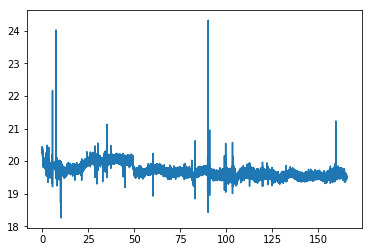

In [10]:
O_max = 35
O2 = np.array(Data['Gas_analyser_O2%'])
drop_list = []
while O_max > 22:
    O_max = np.max(O2)
    i = np.argmax(O2)
    drop_list.append(i)
    O2[i] = 20
    
O_min = 15
while O_min < 18:
    O_min = np.min(O2)
    i = np.argmin(O2)
    drop_list.append(i)
    O2[i] = 20
    
print (drop_list)  
Data = Data.drop(drop_list)
# Data.to_csv('Run_5P_edit.csv')
plt.plot(Data['Time'], Data['Gas_analyser_O2%'])
plt.show()

In [ ]:
plt.plot(Data['Time'], Data['Temperature(C)'])
plt.plot(Data['Time'], Data['Dosing_average_(on/off)'])

In [ ]:
delta_t(start, [2019,3,31,7,0,0])/3600